In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-scaled/wine_scaled.csv


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [37]:
wine_scaled=pd.read_csv('/kaggle/input/wine-scaled/wine_scaled.csv')

In [38]:
wine_scaled.shape

(161, 14)

In [39]:
wine_scaled.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,1.495711,-0.571130,0.277425,-1.208619,2.309259,0.808420,1.034224,-0.643463,1.415284,0.296494,0.372149,1.826678,0.947436,1
1,0.200698,-0.504145,-0.928625,-2.672685,0.118914,0.570475,0.728906,-0.808165,-0.511374,-0.300438,0.418153,1.091015,0.900976,1
2,0.150407,0.050878,1.275535,-0.210392,0.200038,0.808420,1.217414,-0.478761,2.407227,0.315445,0.326144,0.765626,1.319115,1
3,1.671732,-0.341465,0.568540,-0.809329,1.173525,2.474030,1.471845,-0.972867,1.205450,1.319806,-0.455928,1.161752,2.232826,1
4,0.250990,0.270973,2.107293,0.588189,1.579144,0.808420,0.657665,0.262398,0.518720,-0.328863,0.372149,0.426090,-0.074682,1


In [40]:


# Separate features and target
X = wine_scaled.drop(['class'], axis=1)
y = wine_scaled['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"SVM Model Accuracy-linear: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

SVM Model Accuracy-linear: 93.94%
Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.85      0.92        13
           3       0.88      1.00      0.93         7

    accuracy                           0.94        33
   macro avg       0.93      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33

Confusion Matrix:
[[13  0  0]
 [ 1 11  1]
 [ 0  0  7]]


In [41]:

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"SVM Model Accuracy- RBF kernel: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

SVM Model Accuracy- RBF kernel: 96.97%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.92      0.96        13
           3       0.88      1.00      0.93         7

    accuracy                           0.97        33
   macro avg       0.96      0.97      0.96        33
weighted avg       0.97      0.97      0.97        33

Confusion Matrix:
[[13  0  0]
 [ 0 12  1]
 [ 0  0  7]]


In [42]:
# Train the SVM model with Sigmoid kernel
svm_model = SVC(kernel='sigmoid', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"SVM Model Accuracy- Sigmoid kernel: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

SVM Model Accuracy- Sigmoid kernel: 93.94%
Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.85      0.92        13
           3       0.88      1.00      0.93         7

    accuracy                           0.94        33
   macro avg       0.93      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33

Confusion Matrix:
[[13  0  0]
 [ 1 11  1]
 [ 0  0  7]]


In [43]:
# Train the SVM model with poly kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm_poly.fit(X_train, y_train)
# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"SVM Model Accuracy- poly kernel: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

SVM Model Accuracy- poly kernel: 93.94%
Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.85      0.92        13
           3       0.88      1.00      0.93         7

    accuracy                           0.94        33
   macro avg       0.93      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33

Confusion Matrix:
[[13  0  0]
 [ 1 11  1]
 [ 0  0  7]]


In [44]:
# Linear kernel SVM with GridSearchCV
param_grid_linear = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear']
}
grid_linear = GridSearchCV(SVC(), param_grid_linear, refit=True, verbose=2, cv=5)
grid_linear.fit(X_train, y_train)
print(f"Best Parameters for Linear Kernel: {grid_linear.best_params_}")
y_pred_grid_linear = grid_linear.best_estimator_.predict(X_test)
accuracy_grid_linear = accuracy_score(y_test, y_pred_grid_linear)
print(f"Tuned Linear Kernel SVM Accuracy: {accuracy_grid_linear * 100:.2f}%")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, ke

In [45]:
# Polynomial kernel SVM with GridSearchCV
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'],
    'kernel': ['poly']
}
grid_poly = GridSearchCV(SVC(), param_grid_poly, refit=True, verbose=2, cv=5)
grid_poly.fit(X_train, y_train)
print(f"Best Parameters for Polynomial Kernel: {grid_poly.best_params_}")
y_pred_grid_poly = grid_poly.best_estimator_.predict(X_test)
accuracy_grid_poly = accuracy_score(y_test, y_pred_grid_poly)
print(f"Tuned Polynomial Kernel SVM Accuracy: {accuracy_grid_poly * 100:.2f}%")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=scale

In [46]:
# Sigmoid kernel SVM with GridSearchCV
param_grid_sigmoid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['sigmoid']
}
grid_sigmoid = GridSearchCV(SVC(), param_grid_sigmoid, refit=True, verbose=2, cv=5)
grid_sigmoid.fit(X_train, y_train)
print(f"Best Parameters for Sigmoid Kernel: {grid_sigmoid.best_params_}")
y_pred_grid_sigmoid = grid_sigmoid.best_estimator_.predict(X_test)
accuracy_grid_sigmoid = accuracy_score(y_test, y_pred_grid_sigmoid)
print(f"Tuned Sigmoid Kernel SVM Accuracy: {accuracy_grid_sigmoid * 100:.2f}%")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=scale, ker

In [47]:
# Print classification report and confusion matrix for the best model
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_grid_poly)) 
print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred_grid_poly)) 

Classification Report for Best Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         7

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Confusion Matrix for Best Model:
[[13  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [49]:
# RBF kernel SVM with GridSearchCV
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}
grid_rbf = GridSearchCV(SVC(), param_grid_rbf, refit=True, verbose=2, cv=5)
grid_rbf.fit(X_train, y_train)
print(f"Best Parameters for rbf Kernel: {grid_rbf.best_params_}")
y_pred_grid_rbf = grid_rbf.best_estimator_.predict(X_test)
accuracy_grid_rbf = accuracy_score(y_test, y_pred_grid_rbf)
print(f"Tuned RBF Kernel SVM Accuracy: {accuracy_grid_rbf * 100:.2f}%")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10,

In [52]:
from sklearn.model_selection import cross_val_score

# Using 5-fold cross-validation
cv_scores = cross_val_score(SVC(kernel='poly', C=1, degree=3, gamma='scale'), wine_scaled, y, cv=5)

print(f"Cross-Validation Scores for kernel -poly: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean() * 100:.2f}%")

Cross-Validation Scores for kernel -poly: [0.93939394 1.         1.         1.         1.        ]
Mean Cross-Validation Score: 98.79%


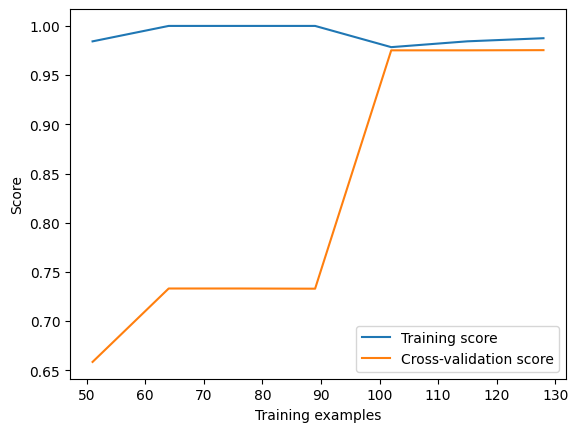

In [51]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()